# Introduction

This notebook will focus primarily statistical side of the time series modelling, including how to define Correlation's, the concept of Stationarity, Auto-Correlation & Partial Auto-Correlation Function, Auto-Regressive & Moving Average Processes in modelling and how to perform Model Diagnostics.

<b>Interesting Read : </b>[Engineering Statistics Handbook](https://www.itl.nist.gov/div898/handbook/index.htm)

<img src='../../Materials/Engineering Statistic Handbook - Cover.png' width='250' align='left'>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

[R - Libraries : Some useful libraries and components for Time Series Analysis in R - by Rob.J.Hyndman](https://cran.r-project.org/web/views/TimeSeries.html)

# Imports

In [1]:
# General
from warnings import filterwarnings
filterwarnings('ignore')
from cycler import cycler


# Data Wrangling
import pandas as pd
import numpy as np

# Data Viualization
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl

# Time Series Specific
from statsmodels.tsa.seasonal import seasonal_decompose


# Datetime
from datetime import datetime

# Path and Variable Initialisation

In [619]:
root_path = '../../'
raw_datapath = root_path+'Raw Data/'
prepared_datapath = root_path+'Prepared Data/'

# USA
usa_cipsu_datapath = raw_datapath+'USA_CIPSU.csv'

# Consumer Price Index for India with Groups and Subgroups
cpi_datapath = raw_datapath+'cpi_states_and_groups.csv'
# Total Air Passengers
airpassengers_datapath = raw_datapath+'AirPassengers.csv'
# Total Air Passengers
houseprices_datapath = raw_datapath+'Housing_data_prices.csv'
# Australlian Monthly Beer Production
beerprod_datapath = raw_datapath+'Australlian_Monthly_Beer_Production.csv'
# Britannia Stock Prices
britanniastock_datapath = raw_datapath+'BRITANNIA.NS.csv'
# Air Gap Data
airgap_datapath = raw_datapath+'airGap.csv'
# Housing Prices with Missing Data
housepmiss_datapath = raw_datapath+'housing-with-missing-value.csv'
# Monthly Milk production
milkprod_datapath = raw_datapath+'monthly-milk-production-pounds.csv'
# Population and Energy Consumption
popenergy_datapath = raw_datapath+'global_pop_energy.csv'
# USA CPI
usacpi_datapath = raw_datapath+'USA_CPI.csv'
# AntiDiabetic DrugSales
antidiabetic_datapath = raw_datapath+'AntiDiabetic_DrugSales_Mn.csv'
# Australlian Electricity Priduction
elecprod_datapath = raw_datapath+'Australlian_Monthly_Electricity_Production_BillionKWh.csv'
# AntiDiabetic DrugSales
antidiabetic_datapath = raw_datapath+'AntiDiabetic_DrugSales_Mn.csv'
# Australlian Visitors
visitors5r_datapath = raw_datapath+'Australlia_Vistors_5Regions_Million.csv'

In [76]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (15,7)
plt.style.use('dark_background')
# plt.style.use('ggplot')

# Reading Datasets

In [620]:
usa_cipsu_data = pd.read_csv(usa_cipsu_datapath, index_col=0, parse_dates=True)

cpi_data = pd.read_csv(cpi_datapath, header=[1])

airpassengers_data = pd.read_csv(airpassengers_datapath, index_col=0, parse_dates=True)

houseprices_data = pd.read_csv(houseprices_datapath, index_col=0)

beerprod_data = pd.read_csv(beerprod_datapath, index_col=0, parse_dates=True)

britanniastock_data = pd.read_csv(britanniastock_datapath, index_col=0, parse_dates=True)

housepmiss_data = pd.read_csv(housepmiss_datapath, index_col=0)

milkprod_data = pd.read_csv(milkprod_datapath, index_col=0)

popenergy_data = pd.read_csv(popenergy_datapath, index_col=0, parse_dates=True)

usacpi_data = pd.read_csv(usacpi_datapath, index_col=0, parse_dates=True)

visitors5r_data = pd.read_csv(visitors5r_datapath, index_col=0, parse_dates=True)

# Processing Data

## USA Consumer, Income... data

In [80]:
usa_cipsu_data

,Consumption,Income,Production,Savings,Unemployment
index,,,,,
1970-01-01,0.615986,0.972261,-2.452700,4.810312,0.9
1970-04-01,0.460376,1.169085,-0.551525,7.287992,0.5
1970-07-01,0.876791,1.553271,-0.358708,7.289013,0.5
1970-10-01,-0.274245,-0.255272,-2.185455,0.985230,0.7
1971-01-01,1.897371,1.987154,1.909734,3.657771,-0.1
...,...,...,...,...,...
2015-07-01,0.664970,0.801663,0.380606,3.180930,-0.3
2015-10-01,0.561680,0.740063,-0.845546,3.482786,0.0
2016-01-01,0.404682,0.519025,-0.417930,2.236534,0.0


In [621]:
airpassengers_data.columns = ['Passengers']
airpassengers_data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [623]:
beerprod_data.columns = ['MBP']
beerprod_data.head()

,MBP
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [624]:
britanniastock_data = britanniastock_data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
britanniastock_data=britanniastock_data.dropna()
britanniastock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-02,10.6000,10.6000,10.6000,10.6000,1500.0
1996-01-03,10.6667,10.6667,10.4667,10.4667,3000.0
1996-01-05,10.6667,10.6667,10.4667,10.4733,6000.0
1996-01-08,10.3333,10.5333,10.3333,10.5333,3000.0
1996-01-10,10.0667,10.0667,10.0667,10.0667,1500.0


# Correlation

**Correlation** : Two variables are said to be correlated when the value assumed by one affects the distribution of the other. It reflects the association between the two variables whose strength usually lies within the range of -1 to +1. If, as the value of X increase there is an increase in Y, then X & Y are said to be positively correlated. Also if, as the value of X decrease there is an increase in Y, then X & Y are said to be negatively correlated.

Different Types Of Correlations

<img src='https://miro.medium.com/max/2000/1*cxBhYwEBPLvs0E8E7Ehe_g.png' width='500'>

- Pearson Correlation : Quantifying association between Two continuous features.
\begin{equation}
    \rho_{p}=\frac{Cov(X,Y)}{\sigma_{x} \sigma_{y}} = \frac{\sum_{i=1}^{n}((x_{i}-\bar{x})(y_{i}-\bar{y}))}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^2 }*{\sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^2 }}}
\end{equation}


- Spearman Correlation : Quantifying `RANK` association between ordinal & continuous features.
\begin{equation}
    \rho_{s}=\frac{Cov(rank(X),rank(Y))}{\sigma_{rank(x)} \sigma_{rank(y)}} = \frac{\sum_{i=1}^{n}((rank(x_{i})-rank(\bar{x}))(rank(y_{i})-rank(\bar{y}))}{\sqrt{\sum_{i=1}^{n}(rank(x_{i})-rank(\bar{x}))^2 }*{\sqrt{\sum_{i=1}^{n}(rank(y_{i})-rank(\bar{y}))^2 }}}
\end{equation}


- Kendall Tau Correlation : Quantifying `RANK` association between ordinal & continuous features, works quite well with Non-Normally distributed data.

\begin{equation}
    \tau_{k} = \frac{\sum_{i=1}^{n} \sum_{j=1}^{n} signum(x_{i}-x_{j}) signum(y_{i}-y_{j})}{n(n-1)}
\end{equation}

- Point Biserial Correlation : Quantifying association between Nominal and Continous Feature.

\begin{equation}
    r_{pb} = \frac{M_{1}-M_{0}}{s_{n}}\sqrt{\frac{n_{0}n_{1}}{n_{2}}}
\end{equation}


    - Here > M1 : Mean of target across 1 category, ; M2 : Mean of the target across 0 category; sn : Standard Deviation in the data; n0, n1: count of the number of datapoints in each category; n : Total number of datapoints.

- Annova eta values : Quantifying association between Two nominal features.

[A comparision of the Correlations](https://ag-ds-bubble.medium.com/correlations-pearson-correlation-is-not-one-solution-for-all-25f7220220fe)


In [360]:
from scipy.stats import pearsonr, kendalltau, spearmanr, pointbiserialr

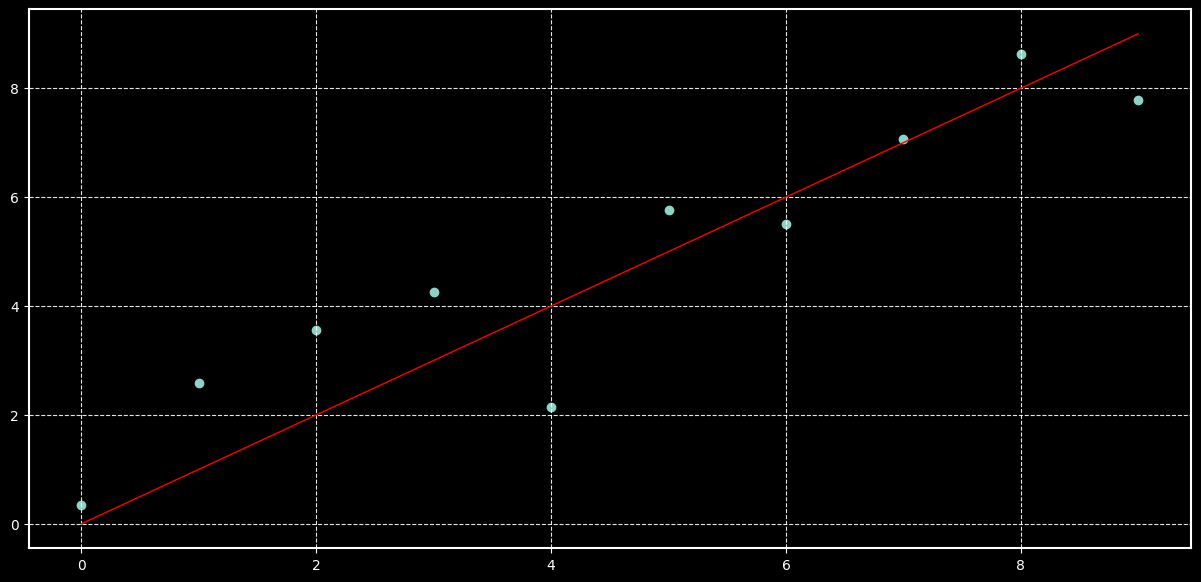

In [317]:
np.random.seed(20)
n = 10
x=np.arange(n)
y=x+np.random.uniform(low=-1,high=1, size=len(x))*2

# x = x/np.linalg.norm(x)
# y = y/np.linalg.norm(y)

_=plt.scatter(x,y)
_=plt.plot(x,x,c='r')

In [354]:
x_mean = np.mean(x)
y_mean = np.mean(y)

x_deviat = x-x_mean
y_deviat = y-y_mean

numerator = sum(x_deviat*y_deviat)/(n)
denominator = np.sqrt(sum(x_deviat**2)/n)*np.sqrt(sum(y_deviat**2)/n)
pearson_corr = numerator/denominator

pearson_corr, pearsonr(x,y)

(0.9245092413583076, (0.9245092413583076, 0.00012961565714921647))

In [357]:
np.corrcoef(x,y)

array([[1.        , 0.92450924],
       [0.92450924, 1.        ]])

In [366]:
pd.DataFrame(np.c_[x,y]).corr()

,0,1
0,1.000000,0.924509
1,0.924509,1.000000


In [96]:
usa_cipsu_data.corr(method='pearson')

,Consumption,Income,Production,Savings,Unemployment
Consumption,1.000000,0.398779,0.547306,-0.239900,-0.540557
Income,0.398779,1.000000,0.277788,0.713579,-0.230470
Production,0.547306,0.277788,1.000000,-0.068661,-0.786735
Savings,-0.239900,0.713579,-0.068661,1.000000,0.110356
Unemployment,-0.540557,-0.230470,-0.786735,0.110356,1.000000


In [99]:
pearsonr(usa_cipsu_data.Production, usa_cipsu_data.Unemployment)

(-0.7867346578393195, 1.2918219310358744e-40)

In [100]:
kendalltau(usa_cipsu_data.Production, usa_cipsu_data.Unemployment)

KendalltauResult(correlation=-0.4522515864903341, pvalue=1.505716248165009e-18)

In [101]:
spearmanr(usa_cipsu_data.Production, usa_cipsu_data.Unemployment)

SpearmanrResult(correlation=-0.5956431956976395, pvalue=2.4319494039211435e-19)

In [111]:
# Generating Correlation Heatmaps
corr_df = usa_cipsu_data.corr(method='pearson')
corr_df = corr_df.style
corr_df = corr_df.background_gradient(cmap=sns.light_palette("red", as_cmap=True))
corr_df = corr_df.highlight_max(color='black')
corr_df

,Consumption,Income,Production,Savings,Unemployment
Consumption,1.000000,0.398779,0.547306,-0.239900,-0.540557
Income,0.398779,1.000000,0.277788,0.713579,-0.230470
Production,0.547306,0.277788,1.000000,-0.068661,-0.786735
Savings,-0.239900,0.713579,-0.068661,1.000000,0.110356
Unemployment,-0.540557,-0.230470,-0.786735,0.110356,1.000000


In [121]:
lagged_data = pd.DataFrame()
for elag in range(5):
    for ecol in ['Consumption', 'Income']:
        lagged_data[ecol+'_{0}'.format(elag)] = usa_cipsu_data['Consumption'].shift(elag)
lagged_datacorr=lagged_data.corr()
lagged_datacorr = lagged_datacorr[['Income_0', 'Income_1', 'Income_2', 'Income_3', 'Income_4']]
lagged_datacorr = lagged_datacorr[lagged_datacorr.index.isin(['Consumption_0','Consumption_1','Consumption_2',
                                              'Consumption_3','Consumption_4'])]
lagged_datacorr

,Income_0,Income_1,Income_2,Income_3,Income_4
Consumption_0,1.000000,0.349959,0.314355,0.334530,0.145282
Consumption_1,0.349959,1.000000,0.350226,0.314503,0.334560
Consumption_2,0.314355,0.350226,1.000000,0.351971,0.315446
Consumption_3,0.334530,0.314503,0.351971,1.000000,0.351508
Consumption_4,0.145282,0.334560,0.315446,0.351508,1.000000


In [122]:
lagged_datacorrst = lagged_datacorr.copy().style
lagged_datacorrst = lagged_datacorrst.background_gradient(cmap=sns.light_palette("red", as_cmap=True))
lagged_datacorrst = lagged_datacorrst.highlight_max(color='black')
lagged_datacorrst

,Income_0,Income_1,Income_2,Income_3,Income_4
Consumption_0,1.000000,0.349959,0.314355,0.334530,0.145282
Consumption_1,0.349959,1.000000,0.350226,0.314503,0.334560
Consumption_2,0.314355,0.350226,1.000000,0.351971,0.315446
Consumption_3,0.334530,0.314503,0.351971,1.000000,0.351508
Consumption_4,0.145282,0.334560,0.315446,0.351508,1.000000


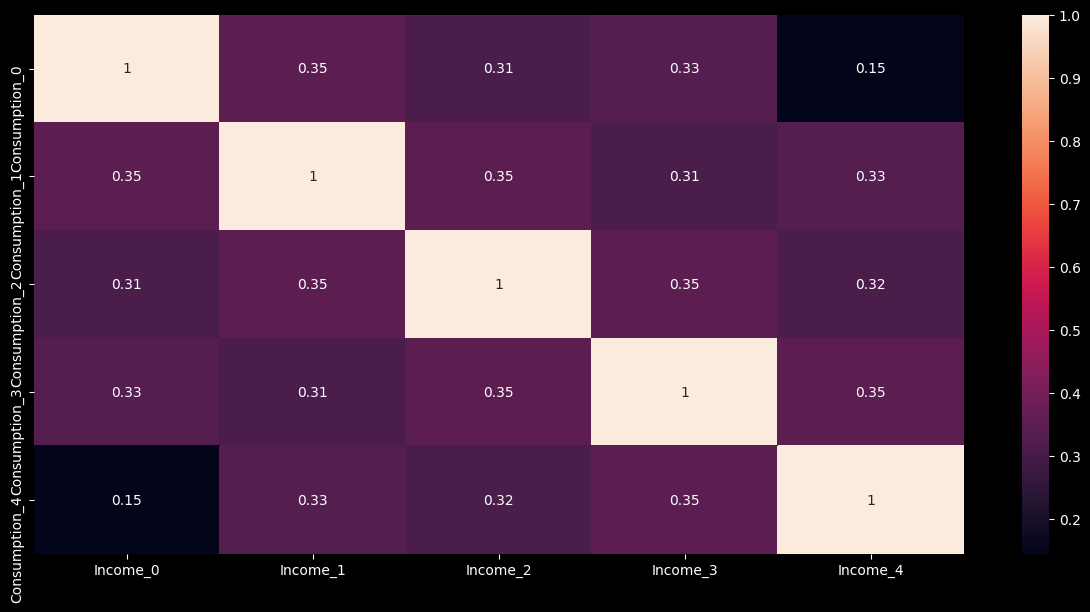

In [125]:
_=sns.heatmap(lagged_datacorr, annot=True)

# Autocorrelation

Since Time Series, of any Object - being measured, is something which is not `expected` to abruptly shift from its trajectory/course which stems a notion of previous `timestamped` values having some association/correlation with the values in very near future/ in a particular seasonal patter to arise. This concpet is something we can take advantage of for predicting the future.

Use of AutoCorrelation can be Multiple :- 

- Figuring out which model to use
- Estimating the parameters of the models
- Understanding the Underlying structure of the Time Series

****
There are two forms of Auto-Correlation that are used in Time Series Analysi

- ***Auto-Correlation*** : Auto-Correlation as designed above is something which lets us gauge into the internal structure as to how are the previous datapoints related to the ones that are to come. But the catch here is that, 

Suppose we are calcluate Auto - Correlation between 
  
1)  AC between $y_{t}$ and $y_{t-1}$  = 0.78

2)  AC between $y_{t}$ and $y_{t-2}$ = 0.76

And we have the following conversation :- 


**Me :)** Were we to use both of these variables as predictors, since $y_{t-1}$ is already explaining 78% of variance(correlation, for simplicity) of the $y_{t}$, would it be even helpful to use $y_{t-2}$?

**You:)** Well it is having 0.76 correlation, maybe? 🧐

**Me:)** Ok, then i will reverse my question, if $y_{t-2}$ is having 0.76 correlation, would it be wise for us to even consider the $y_{t-1}$ series?

**You:)** Well I dont really know, I understand that the there will be effect of $y_{t-2}$ in the $y_{t-1}$ series but how do i quantify that?

**Me:)** PARTIAL AUTO CORRELATION 

**You:)** 🤩🤩🤩🤩, wait, what is Partial Auto Correlation and how do i quantify it?


Getting a value of correlation neglecting the compunding effect of the series..

- ***Partial Auto-Correlation*** : 

**Me:)** Effectively what we need from Partial Auto-Correlation is for us to tell that what is the effect of `Individual Lagged Time Series` $y_{t-n}$ on the current time series $y_{t}$. So this is what we do :-

- 1.) Take the series $y_{t-1}$ and  $y_{t}$
- 2.) Regress $y_{t-1}$ on  $y_{t}$ and note the Correlation between the two.
- 3.) Take the residuals(Whatever $y_{t-1}$ wasnt able to explain of $y_{t}$) of that regression, basically the errors
- 4.) Now regress the $y_{t-2}$ on the `errors`, and repeat...

[Partial Auto Correlation](https://towardsdatascience.com/understanding-partial-auto-correlation-fa39271146ac)

Lets jump to code!


<b>Auto-Correlation</b>

In [388]:
from statsmodels.graphics.tsaplots import acf, plot_acf, pacf, plot_pacf

In [389]:
tempdata = lagged_data[[k for k in lagged_data.columns if 'Con' in k]]
tempdata.corr().iloc[:,0]

Consumption_0    1.000000
Consumption_1    0.349959
Consumption_2    0.314355
Consumption_3    0.334530
Consumption_4    0.145282
Name: Consumption_0, dtype: float64

array([1.        , 0.3499212 , 0.31397023, 0.33385183, 0.14401974])

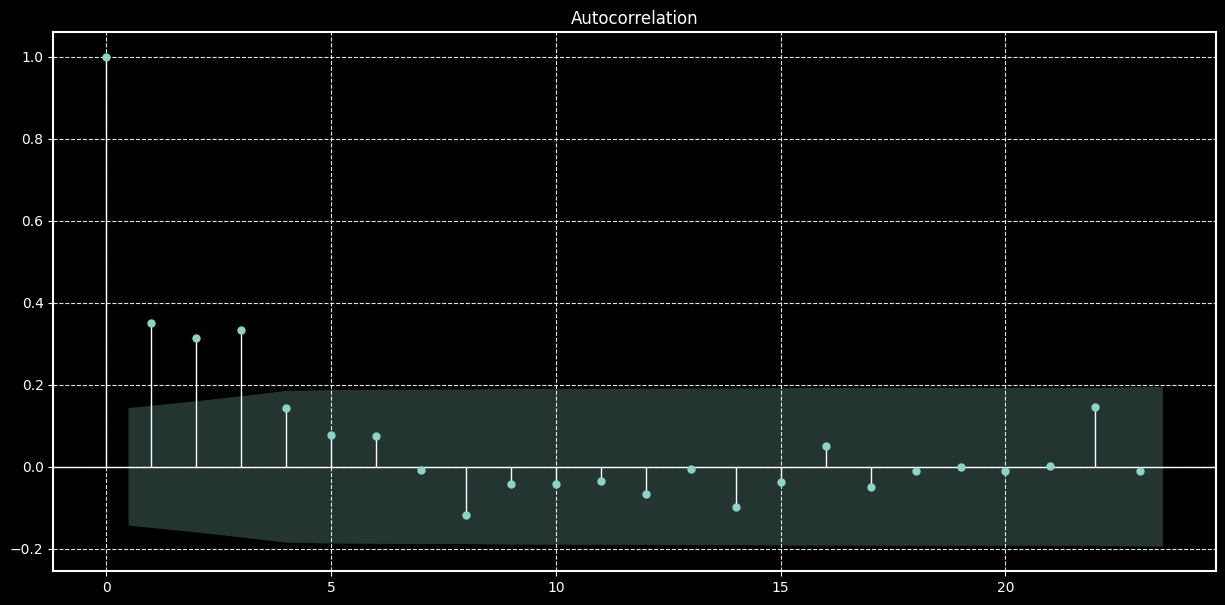

In [390]:
_=plot_acf(lagged_data.Consumption_0)
acf(lagged_data.Consumption_0)[:5]

<b>Partial Auto-Correlation</b>

In [608]:
from sklearn import linear_model

def calc_pacf(data, lags = 2):
    data.name='y'
    data = data.to_frame()
    pcorr=[]
    
    if lags==1:
        return [1]
    elif lags==2:
        data['y_L1'] = data.y.shift(1)
        return [1, data.corr().values[1][0]]
    else:
        data['y_L1'] = data.y.shift(1)
        pcorr = [1, data.corr().values[1][0]]
        
        for _l in range(2,lags):
            _tlag_col = 'y_L_{0}'.format(_l)
            calcData = data.y.to_frame().copy()
            calcData[_tlag_col] = calcData.y.shift(_l)
            reg_cols = []
            for _ll in range(1,_l):
                scol = 'y_L_{0}'.format(_ll)
                calcData[scol] = calcData.y.shift(_ll)
                reg_cols.append(scol)
            calcData = calcData.dropna()
            
            # Fit the first Linear Model on t_i
            _model = linear_model.LinearRegression()
            _model.fit(calcData[reg_cols], calcData['y'])
            _resid1 = calcData['y']-_model.predict(calcData[reg_cols])
            # Fit the first Linear Model on t_l
            _model = linear_model.LinearRegression()
            _model.fit(calcData[reg_cols], calcData[_tlag_col])
            _resid2 = calcData[_tlag_col]-_model.predict(calcData[reg_cols])
            pcorr.append(pearsonr(_resid1.values, _resid2.values)[0])
            
        return pcorr


In [615]:
calc_pacf(lagged_data.Consumption_0,10)

[1,
 0.34995917948916117,
 0.21865876117960048,
 0.20532038981349574,
 -0.06930920682910445,
 -0.07500885865116029,
 -0.010554291083197932,
 -0.0416574253589047,
 -0.13739012793374936,
 0.028828384674378673]

array([ 1.        ,  0.3518025 ,  0.22094473,  0.20947002, -0.06991332,
       -0.07718982, -0.01104804, -0.04182686, -0.1403141 ,  0.02577213])

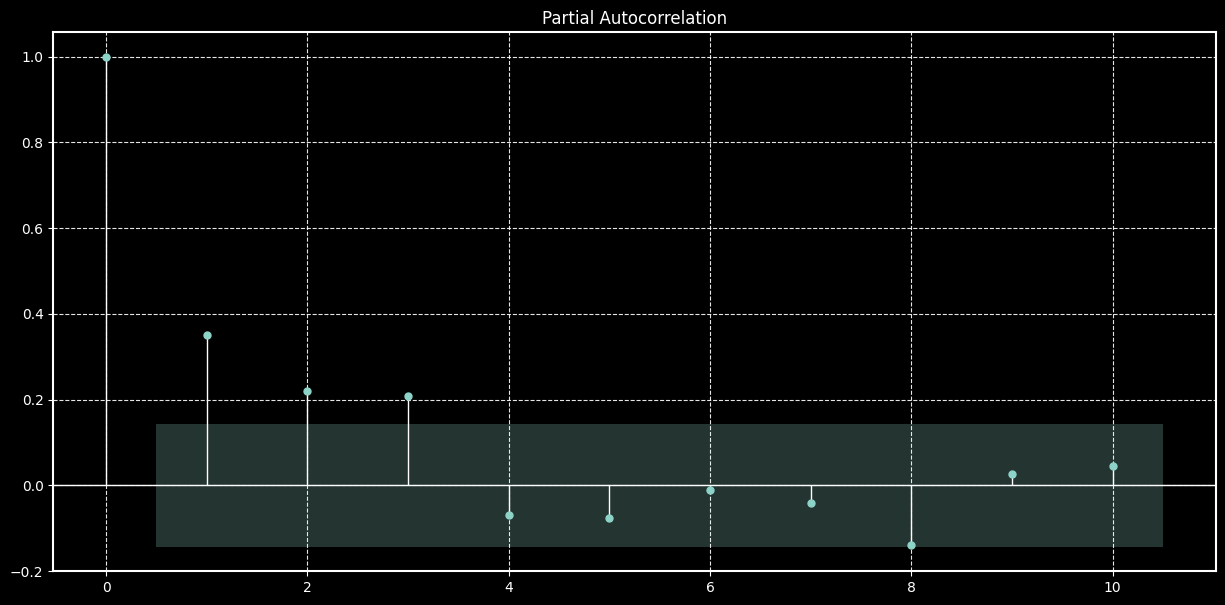

In [616]:
_=plot_pacf(lagged_data.Consumption_0, lags=10)
pacf(lagged_data.Consumption_0)[:10]

# Stationarity

Dealing with Time Series Models come with some assumptions, especially univariate models, in which `Stationarity` is one of the primary requirements.

If a Time Series is Stationary, 
- The Time Series $y_{t}$ has a constant mean, i.e $E[Y_{t}]=const$
- The Time Series $y_{t}$ has a constant variance, i.e $Var[Y_{t}]=const$
- The Time Series $y_{t}$ doesnt exhibit seasonality.

How to detect if a Time Seiries is Stationary?
- Visual Inspection of the Time Series Plot
- Local & Global Tests
- Unit Root Tests - `ADF` Test & `KPSS` Test

In [ ]:
statistical tests
Methods - Differencing(why differencing works) & Log

In [648]:
def get_splot1():
    fig, axes = plt.subplots(2,3, figsize=(20,10))
    _=usa_cipsu_data.Consumption.plot(ax=axes[0,0])
    _=axes[0,0].set_xlabel('')
    _=axes[0,0].set_ylabel('US Consumption pct change')
    _=usa_cipsu_data.Income.plot(ax=axes[0,1])
    _=axes[0,1].set_xlabel('')
    _=axes[0,1].set_ylabel('US Income pct change')
    _=usa_cipsu_data.Unemployment.plot(ax=axes[0,2])
    _=axes[0,2].set_xlabel('')
    _=axes[0,2].set_ylabel('US Unemployment pct change')


    _=airpassengers_data.Passengers.plot(ax=axes[1,0])
    _=axes[1,0].set_xlabel('')
    _=axes[1,0].set_ylabel('Passengers')
    _=beerprod_data.MBP.plot(ax=axes[1,1])
    _=axes[1,1].set_xlabel('')
    _=axes[1,1].set_ylabel('Beer Production')
    _=britanniastock_data.Volume.plot(ax=axes[1,2])
    _=axes[1,2].set_xlabel('')
    _=axes[1,2].set_ylabel('Britannia Stock Volume')

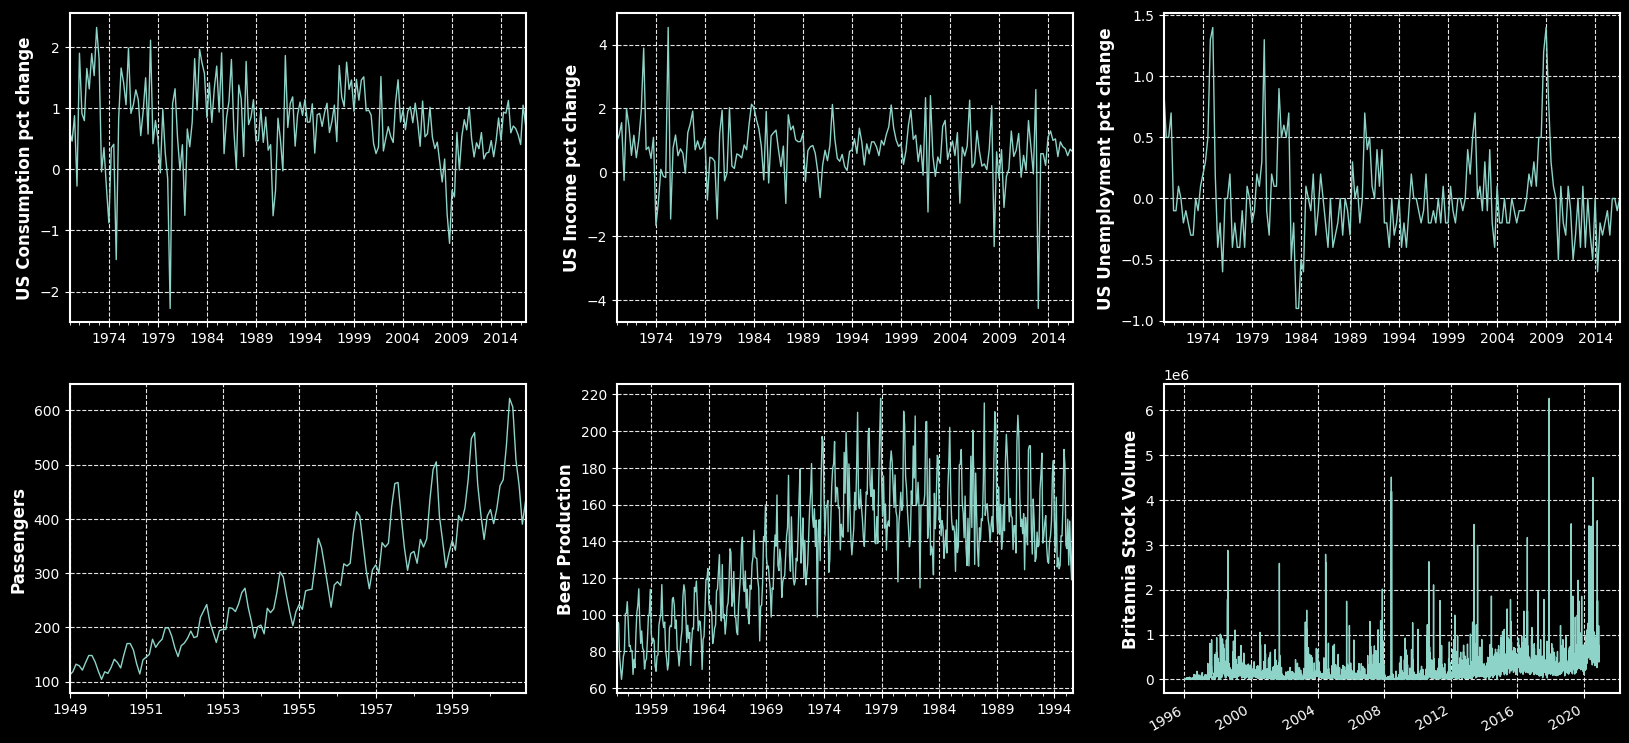

In [649]:
get_splot1()

Of these Time Series which do you think is Stationary?

In [657]:
# Unit Root Tests
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
           dfoutput['Critical Value (%s)'%key] = value
    return dfoutput.to_frame()

def kpss_test(timeseries):
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    return kpss_output.to_frame()

In [658]:
adf_test(usa_cipsu_data.Consumption)

,0
Test Statistic,-4.522487
p-value,0.000179
#Lags Used,2.000000
Number of Observations Used,184.000000
Critical Value (1%),-3.466398
Critical Value (5%),-2.877380
Critical Value (10%),-2.575214


In [659]:
kpss_test(usa_cipsu_data.Consumption)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,0
Test Statistic,0.235168
p-value,0.100000
Lags Used,7.000000
Critical Value (10%),0.347000
Critical Value (5%),0.463000
Critical Value (2.5%),0.574000
Critical Value (1%),0.739000


# Statistical Tests

- Test for Auto Correlation
- Test for Seasonality (Strength) : TODO
- Test for Trend (Strength) : TODO 
- Test for Stationarity
- Test for Distribution

In [746]:
import statsmodels.api as sm

from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.gofplots import qqplot

from scipy import stats

## Tests for Auto-Correlation
- Durbin Watson Test
     - **Null Hypothesis :** There is no serial correlation in the residuals
     - **Alternate Hypothesis :** Residuals follow an AR1 process
     - **In Simple Terms :** If `p-value`<0.05(or any other significance value) then the auto-correlation is present, else if `p-value`>0.05 auto-correlation is absent.
     
     
     
- Ljung-Box Test (More Accurate)
     - **Null Hypothesis :** The residuals are independently distributed.
     - **Alternate Hypothesis :** The residuals are not independently distributed; they exhibit serial correlation.
     - **In Simple Terms :** This tests statistics always results in values ranging in from 0 to 4, if the `test-statistics`=2, then this means that there is no serial autocorrelation, if the `test-statistics` is closer to 0 then it mean there can be `Positive Serial Correlation` or if it is towards 4 it can mean that there might be `Negative Serial Correlation`
     


In [668]:
durbin_watson(britanniastock_data.Close)

0.00027874644639298336

In [669]:
durbin_watson(usa_cipsu_data.Consumption)

0.564113468167673

In [670]:
durbin_watson(beerprod_data.MBP)

0.019486494992529867

<b>Ljung-Box Test</b>

In [685]:
data = sm.datasets.sunspots.load_pandas().data
res = sm.tsa.ARMA(beerprod_data.MBP, (1,1)).fit(disp=-1)
acorr_ljungbox(res.resid, lags=[12], return_df=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,lb_stat,lb_pvalue
12,277.644985,2.286056e-52


In [689]:
data = sm.datasets.sunspots.load_pandas().data
res = sm.tsa.ARMA(usa_cipsu_data.Consumption, (1,1)).fit(disp=-1)
acorr_ljungbox(res.resid, lags=[12], return_df=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


,lb_stat,lb_pvalue
12,12.962432,0.371777


## Tests For stationarity
- [Augmented Dickey Fuller (ADF) Test](https://www.youtube.com/watch?v=1opjnegd_hA)
     - **Null Hypothesis :** A unit root is present in a time series sample
     - **Alternate Hypothesis :** Depending on which version of the test is used, but is usually stationarity or trend-stationarity.
     - **In Simple Terms :** If ADF Test outputs `p-value`>0.05(or Significance level set by you), then the time series is non-stationary
     
     
- Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test
     - **Null Hypothesis :** The data is stationary.
     - **Alternate Hypothesis :** The data is non-stationary.
     - **In Simple Terms :** If KPSS Test outputs `p-value`<0.05(or Significance level set by you), then the time series is non-stationary.

In [673]:
adf_test(beerprod_data.MBP)

,0
Test Statistic,-2.282661
p-value,0.177621
#Lags Used,17.000000
Number of Observations Used,458.000000
Critical Value (1%),-3.444709
Critical Value (5%),-2.867871
Critical Value (10%),-2.570142


In [674]:
kpss_test(beerprod_data.MBP)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


,0
Test Statistic,2.965464
p-value,0.010000
Lags Used,12.000000
Critical Value (10%),0.347000
Critical Value (5%),0.463000
Critical Value (2.5%),0.574000
Critical Value (1%),0.739000


## Tests for Distributions

- Jarque Bera Test
     - **Null Hypothesis :** The data is following a Normal Distribution
     - **Alternate Hypothesis :** The data is following some other distribution.
     - **In Simple Terms :** If Jarque Bera Test outputs `p-value`<0.05(or Significance level set by you), then the time series is not following a Normal Distribution.

In [742]:
def jb_test(timeseries):
    dftest = jarque_bera(timeseries)
    dfoutput = pd.Series(dftest, index=['JB', 'JBpv', 'skew', 'kurtosis'])
    dfoutput = dfoutput.to_frame()
    dfoutput.index.name = 'Measure'
    dfoutput.columns=['Value']
    return dfoutput

jb_test(usa_cipsu_data.Consumption)


,Value
Measure,
JB,7.262111e+01
JBpv,1.700303e-16
skew,-7.960697e-01
kurtosis,5.604889e+00


<AxesSubplot:ylabel='Density'>

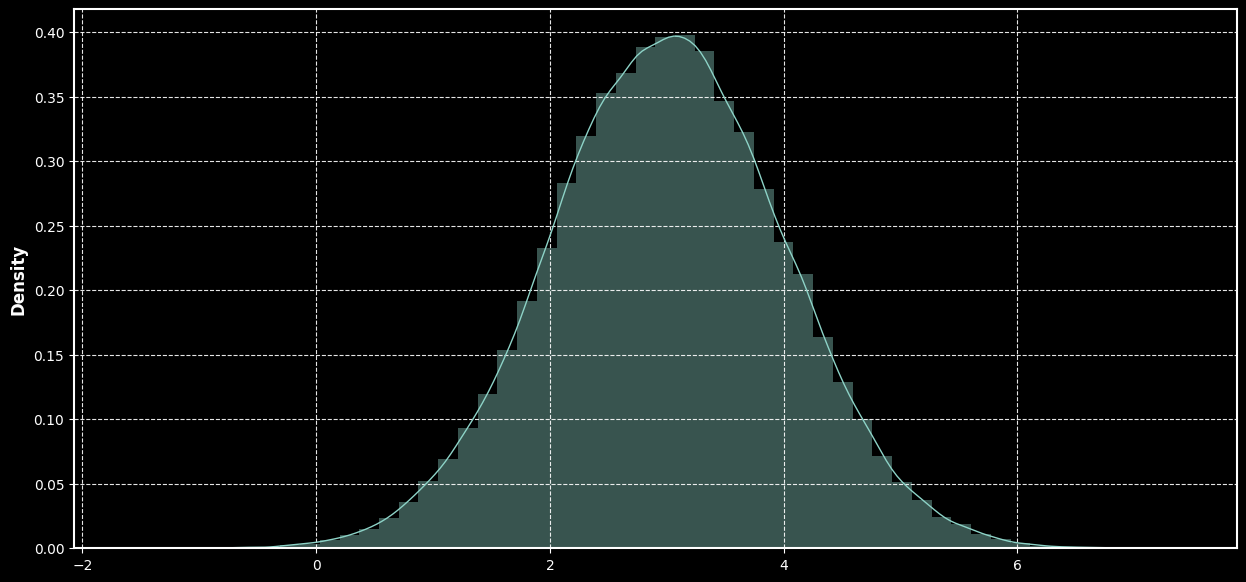

In [750]:
white_noise = np.random.normal(loc=3,size=int(1e5))
sns.distplot(white_noise)

In [751]:
shapiro(white_noise)

ShapiroResult(statistic=0.9999659657478333, pvalue=0.4565691649913788)

In [752]:
jb_test(white_noise)

,Value
Measure,
JB,0.281924
JBpv,0.868522
skew,-0.003781
kurtosis,2.996763


<b>Q-Q Plot</b>

If the line is straight then the data is following the normal distribution

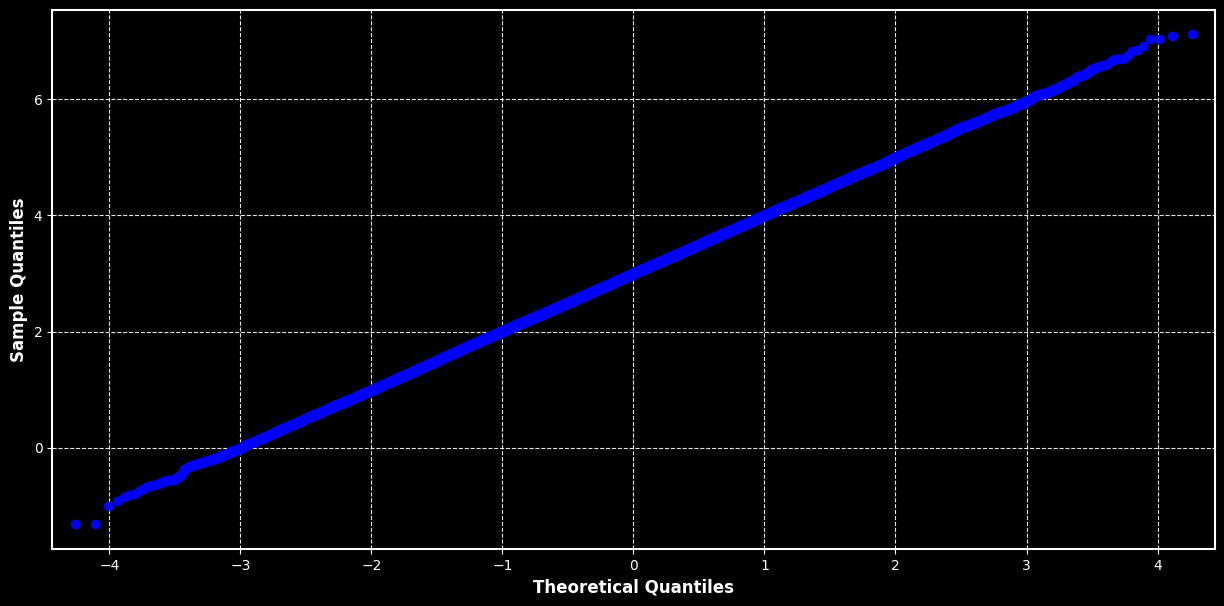

In [753]:
_=qqplot(white_noise)

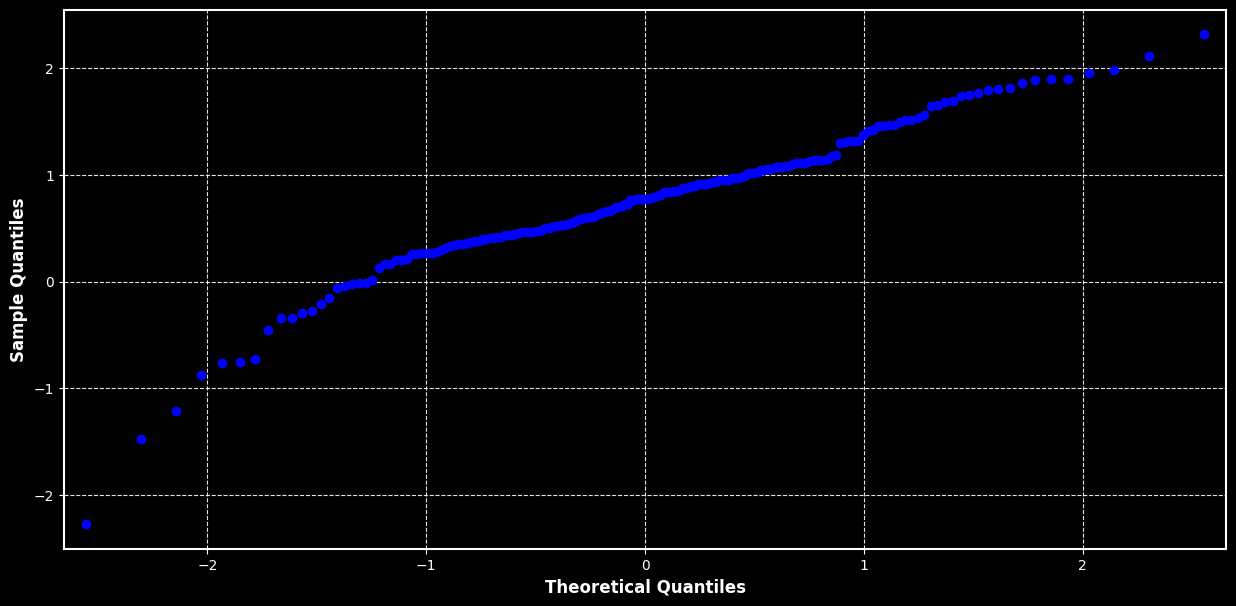

In [754]:
_=qqplot(usa_cipsu_data.Consumption)

# Metrics

- AIC
- BIC
- MAPE
- MSE
- Custom Metrics : Based on the KPI's being tracked

# Model Diagnostics

# Random Testing Space